### This is a test shows a rough approximation of a dummy CME evolution in the heliosphere 

$f(\phi,\;t) \rightarrow f(\phi+\Delta \phi,\;t+\Delta t)$ 

$f(\theta,\;t) \rightarrow f(\theta+\Delta \theta,\;t+\Delta t)$ 

$f(r,\;t) \rightarrow f(r+\Delta r,\;t+\Delta t)$ 

In [195]:
# import necessary packages 
%matplotlib notebook
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import astropy.units as u
from astropy.time import Time
from sunpy.coordinates import HeliographicStonyhurst
from sunpy.coordinates import get_body_heliographic_stonyhurst
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,8)

In [23]:
# get the Sun and Earth locations 
start_obstime = Time('2019-04-03T12:09:59.275561')

obj_lst = ['Sun', 'Earth']
obj_coord = [get_body_heliographic_stonyhurst(obj, time=start_obstime) for obj in obj_lst]

### Level 1.0 

<IPython.core.display.Javascript object>


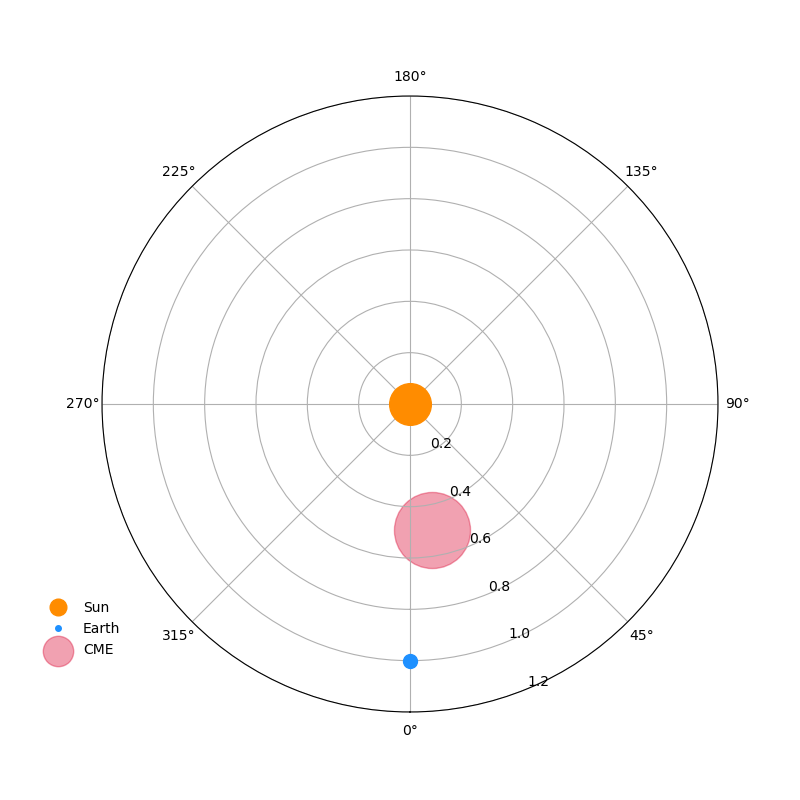

In [216]:
# static 2D model 
fig = plt.figure() #figsize=plt.figaspect(1)
# or: ax = plt.subplot(projection='polar')
ax = fig.add_subplot(111, projection='polar')

# iterate the points between 0 to 360 with step=10 
minoraxes = False
if minoraxes:
    tick = [ax.get_rmax()*2, ax.get_rmax()*0]
    for t in np.deg2rad(np.arange(0, 360, 5)):
        ax.plot([t,t], tick, lw=0.5, color='black', alpha=0.2)

# draw the sun and earth 
sun_size = 30
earth_size = 10
ax.plot(obj_coord[0].lon.to('rad'), obj_coord[0].radius, 'o', color='darkorange', markersize=sun_size, label='Sun')
ax.plot(obj_coord[1].lon.to('rad'), obj_coord[1].radius, 'o', color='dodgerblue', markersize=earth_size, label='Earth')

# draw the CME 
cme_lon = 10
cme_size = sun_size*100
ax.scatter(x=cme_lon*u.degree.to('rad'), y=0.5, c='crimson', alpha=0.4, s=cme_size, label='CME')

ax.legend(bbox_to_anchor=[0.05,0.2], frameon=False, markerscale=0.4)
ax.set_theta_zero_location('S')
ax.set_rmax(1.2)
plt.show()

### Level 1.1 

<IPython.core.display.Javascript object>


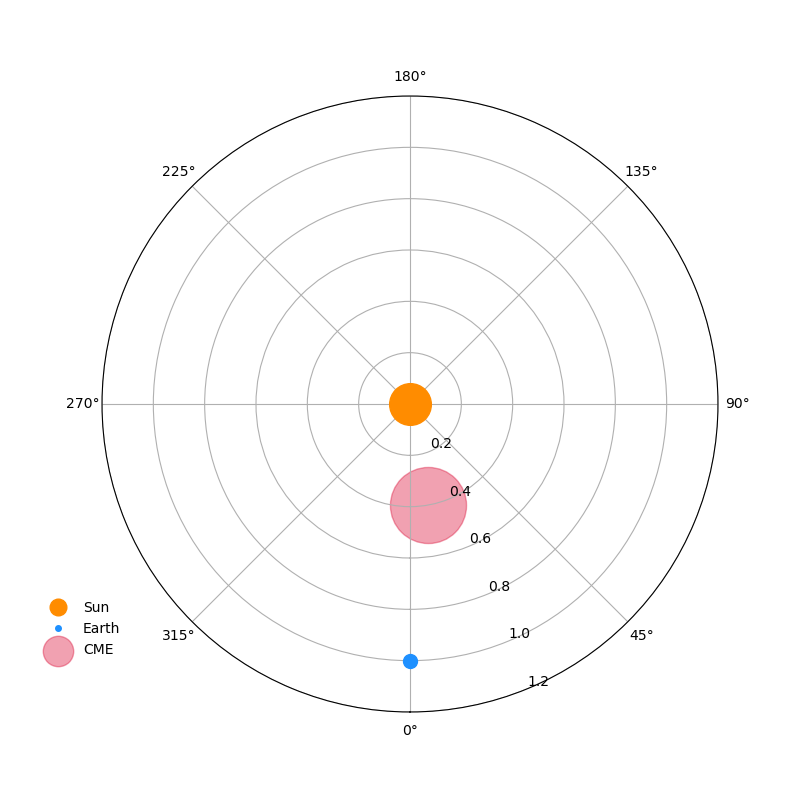

In [217]:
# radial propagation 
fig = plt.figure()
# or: ax = plt.subplot(projection='polar')
ax = fig.add_subplot(111, projection='polar')

# function that draws each frame of the animation 
def animate(i):
    # clear everything 
    ax.clear()
    
    minoraxes = False
    if minoraxes:
        tick = [ax.get_rmax()*2, ax.get_rmax()*0]
        for t in np.deg2rad(np.arange(0, 360, 5)):
            ax.plot([t,t], tick, lw=0.5, color='black', alpha=0.2)

    # draw the sun and earth 
    sun_size = 30
    earth_size = 10
    ax.plot(obj_coord[0].lon.to('rad'), obj_coord[0].radius, 'o', color='darkorange', markersize=sun_size, label='Sun')
    ax.plot(obj_coord[1].lon.to('rad'), obj_coord[1].radius, 'o', color='dodgerblue', markersize=earth_size, label='Earth')

    # draw the CME 
    cme_lon = 10
    cme_size = sun_size*100
    cme_r = np.arange(0, 2, 0.05)
    ax.scatter(x=cme_lon*u.degree.to('rad'), y=cme_r[i], c='crimson', alpha=0.4, s=cme_size, label='CME')

    # adjust the plot orientation 
    ax.set_theta_zero_location('S')
    ax.set_rmax(1.2)
    ax.legend(bbox_to_anchor=[0.05,0.2], frameon=False, markerscale=0.4)

# run the animation
ani = FuncAnimation(fig, animate, frames=30, interval=100)
plt.show()

### Level 1.2 

<IPython.core.display.Javascript object>


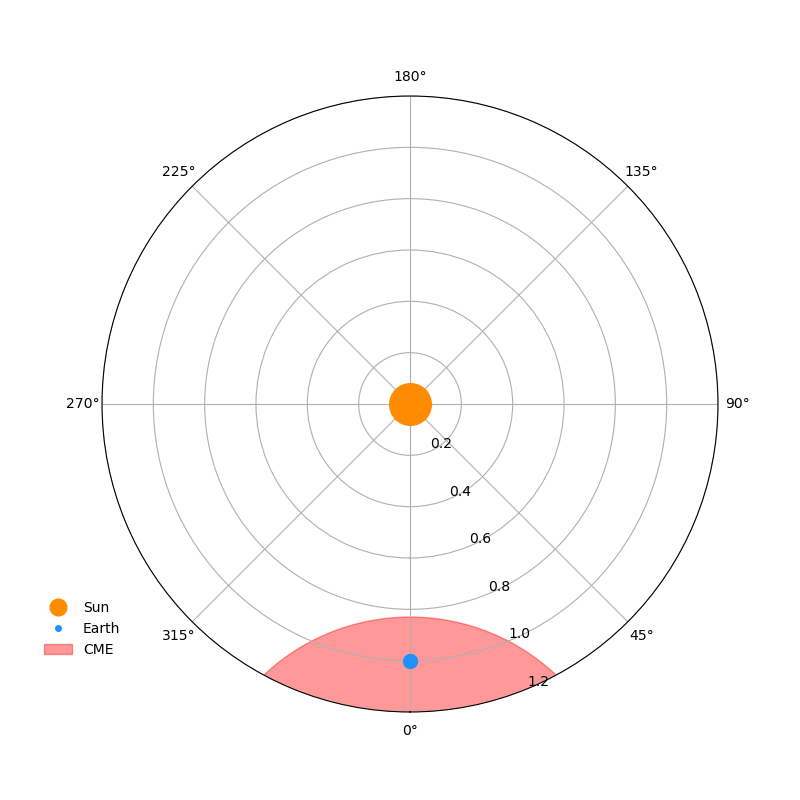

In [218]:
# radial and lateral expansion 
fig = plt.figure()
# or: ax = plt.subplot(projection='polar')
ax = fig.add_subplot(111, projection='polar')

# function that draws each frame of the animation 
def animate(i):
    # clear everything 
    ax.clear()
    
    minoraxes = False
    if minoraxes:
        tick = [ax.get_rmax()*2, ax.get_rmax()*0]
        for t in np.deg2rad(np.arange(0, 360, 5)):
            ax.plot([t,t], tick, lw=0.5, color='black', alpha=0.2)

    # draw the sun and earth 
    sun_size = 30
    earth_size = 10
    ax.plot(obj_coord[0].lon.to('rad'), obj_coord[0].radius, 'o', color='darkorange', markersize=sun_size, label='Sun')
    ax.plot(obj_coord[1].lon.to('rad'), obj_coord[1].radius, 'o', color='dodgerblue', markersize=earth_size, label='Earth')

    # draw the CME 
    cme_lon = 10
    xc = cme_lon*u.degree.to('rad')
    cme_r = -np.arange(0, 100, 0.01)
    cme_size = np.arange(0, 3, 0.005)
    circle = pl.Circle((0,0+cme_r[i]), radius=cme_size[i], transform=ax.transData._b, color='red', alpha=0.4, label='CME')
    ax.add_artist(circle)
    
    #ax.scatter(x=cme_lon*u.degree.to('rad'), y=cme_r[i], c='crimson', alpha=0.4, s=cme_size[i], label='CME')

    # adjust the plot orientation 
    ax.set_theta_zero_location('S')
    ax.set_rmax(1.2)
    ax.legend(bbox_to_anchor=[0.05,0.2], frameon=False, markerscale=0.4)

# run the animation
ani = FuncAnimation(fig, animate, frames=len(cme_r)*7, interval=50)
plt.show()

### Level 2.0 

<IPython.core.display.Javascript object>


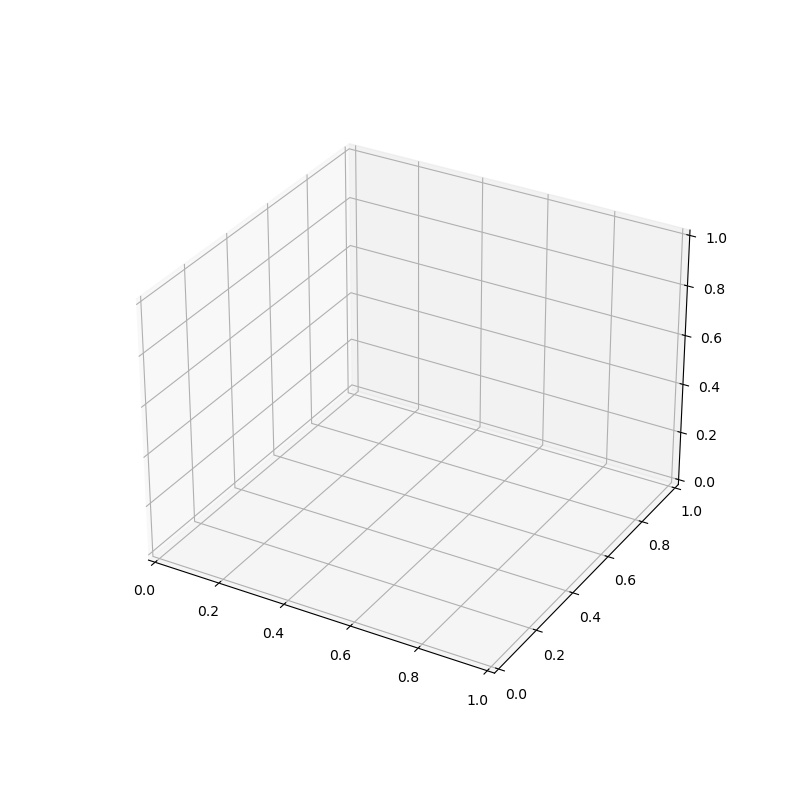

In [219]:
# static 3D model 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


plt.show()

### Level 2.1 

In [3]:
# radial propagation 


### Level 2.2 

In [4]:
# radial and lateral expansion 


### Level 2.3 

In [5]:
# full evolution in all directions 


### Troubleshooting 

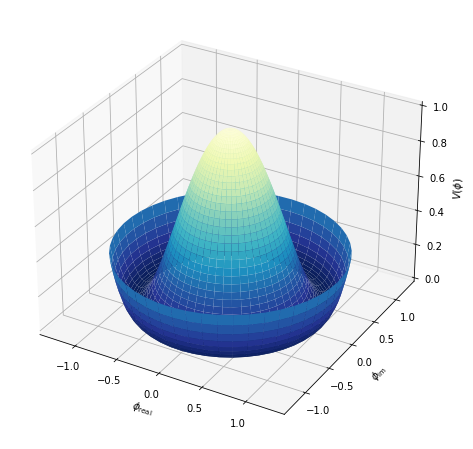

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

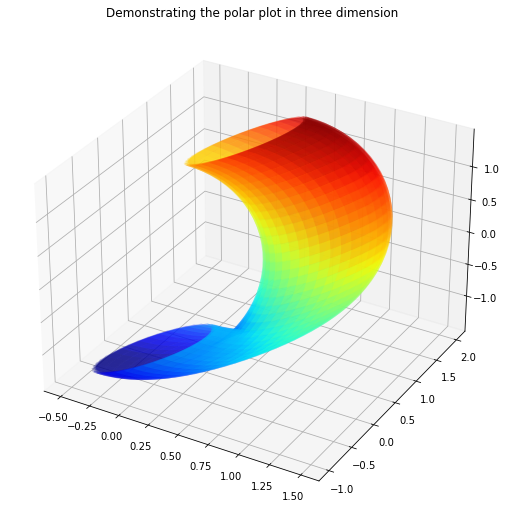

In [16]:
# Create a user-defined function named three_dimensional_polar()
def three_dimensional_polar(phi, theta):
    # Definning the data points to be fitted into the polar plot
    THETA, PHI = np.meshgrid(theta, phi)
    # Defining the radius of the points
    radius = np.cos(PHI)
    # Defining the x coordinates of the points
    x = radius * np.sin(PHI) + np.sin(THETA)
    # Defining the y coordinates of the points
    y = radius * np.cos(PHI) + np.cos(THETA)
    # Defining the z coordinates of the points
    z = radius * np.sin(PHI) + np.cos(THETA)
    # Defining the figure object
    fig = plt.figure(figsize=(9, 9))
    # Defining the axes object
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    # Plotting the figure
    plot = ax.plot_surface(x, y, z, cmap=plt.get_cmap(
    'jet'), linewidth=0, antialiased=True, alpha=0.3)
    # Defining the title of the plot
    plt.title("Demonstrating the polar plot in three dimension")
    # Displaying the plot
    plt.show()

# Creating the main() function
def main():
    # Defining the angle in radian
    theta = np.linspace(0, 5*np.pi, 40)
    # Defining the angle in radian
    phi = np.linspace(0, np.pi, 40)
    # Calling the three_dimensional_polar() function
    three_dimensional_polar(theta, phi)

# Calling the main() function
if __name__ == "__main__":
    main()

<IPython.core.display.Javascript object>


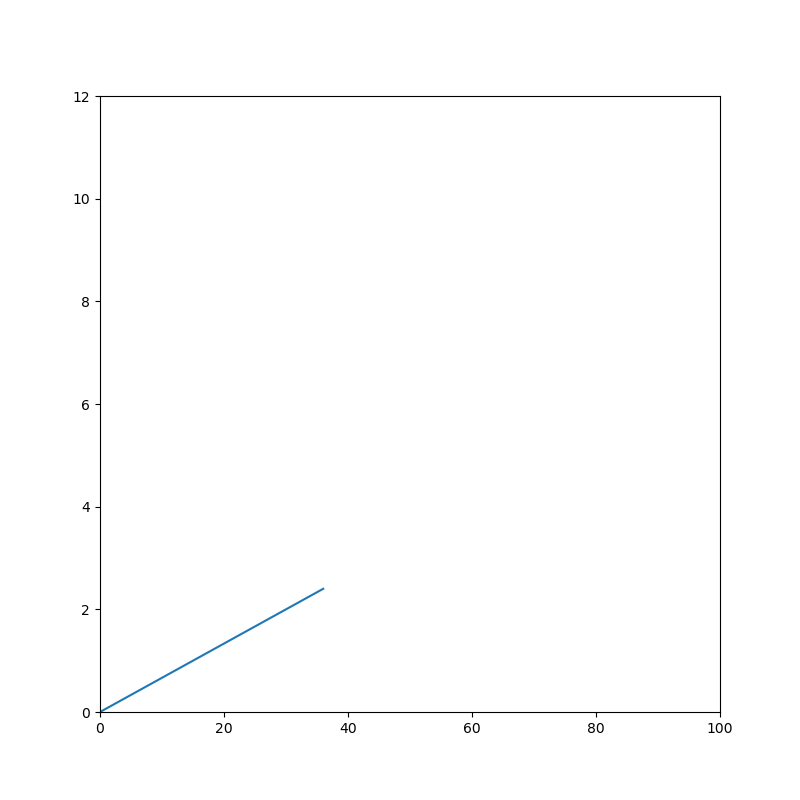

In [107]:
x = []
y = []
  
fig, ax = plt.subplots()
  
# Setting limits for x and y axis
ax.set_xlim(0, 100)
ax.set_ylim(0, 12)
  
# Since plotting a single graph
line, = ax.plot(0, 0) 
  
def animation_function(i):
    x.append(i*15)
    y.append(i)
    line.set_xdata(x)
    line.set_ydata(y)
    return line,
  
animation = FuncAnimation(fig,
                          func=animation_function,
                          frames=np.arange(0, 10, 0.1), 
                          interval=50, repeat=True)
plt.show()

<IPython.core.display.Javascript object>


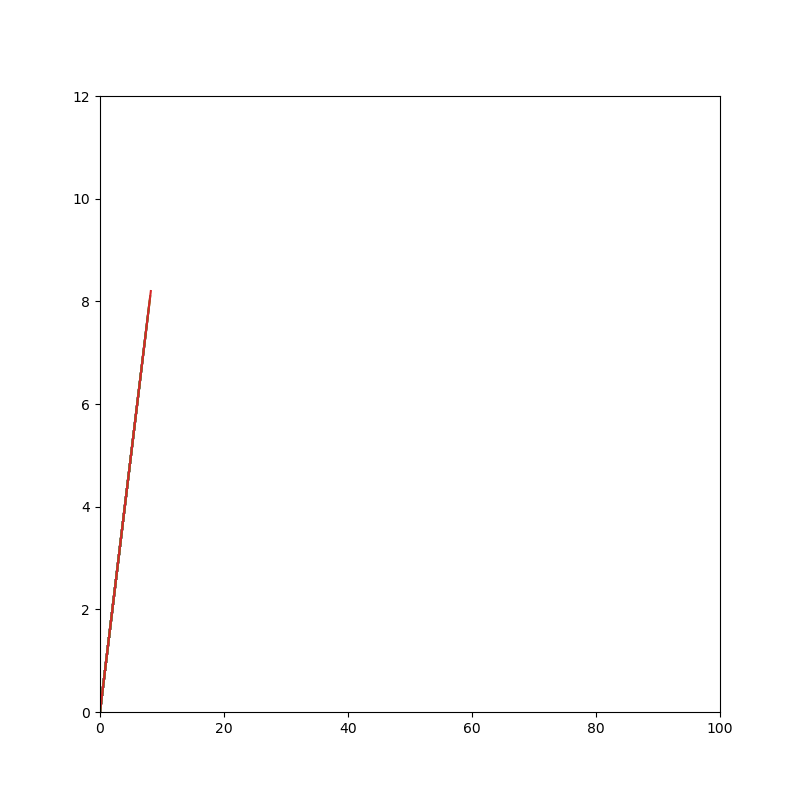

In [121]:
x = np.arange(0, 10, 0.1)
y = np.arange(0, 10, 0.1)
dataSet = np.array([x, y])

def animation_function(i):
    ax.plot(dataSet[0, :i+1], dataSet[1, :i+1], color='blue')

fig, ax = plt.subplots()
animation = FuncAnimation(fig, func=animation_function, frames=len(x), interval=50, repeat=True)
ax.set_xlim(0, 100)
ax.set_ylim(0, 12)
plt.show()

<IPython.core.display.Javascript object>


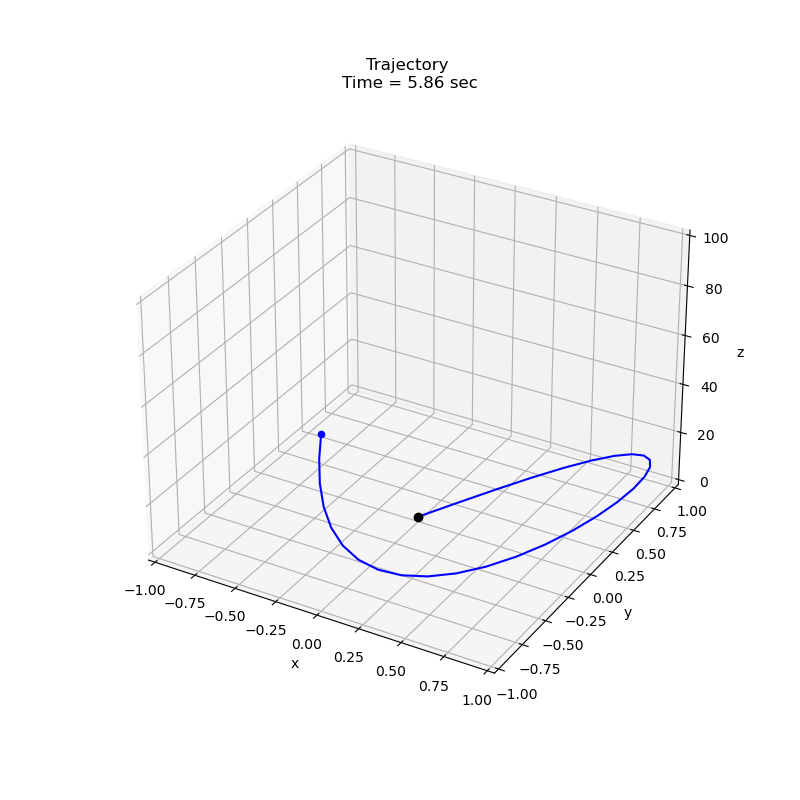

'\n# Saving the Animation\nf = r"c://Users/(Insert User)/Desktop/animate_func.gif"\nwritergif = animation.PillowWriter(fps=numDataPoints/6)\nline_ani.save(f, writer=writergif)\n'

In [91]:
# Time Array
t = np.linspace(0, 20, 100)

# Position Arrays
x = np.sin(np.pi/5 * t)
y = np.sin(np.pi/3 * t)
z = np.linspace(0, 100, 100)

# Setting up Data Set for Animation
dataSet = np.array([x, y, z])  # Combining our position coordinates
numDataPoints = len(t)

def animate_func(num):
    # Clears the figure to update the line, point, title, and axes 
    ax.clear()
    
    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot3D(dataSet[0, :num+1], dataSet[1, :num+1], dataSet[2, :num+1], c='blue')
    
    # Updating Point Location 
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], c='blue', marker='o')
    
    # Adding Constant Origin
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0], c='black', marker='o')
    
    # Setting Axes Limits
    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([0, 100])

    # Adding Figure Labels
    ax.set_title('Trajectory \nTime = ' + str(np.round(t[num], decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

# Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = FuncAnimation(fig, animate_func, frames=numDataPoints, interval=50)
plt.show()

'''
# Saving the Animation
f = r"c://Users/(Insert User)/Desktop/animate_func.gif"
writergif = animation.PillowWriter(fps=numDataPoints/6)
line_ani.save(f, writer=writergif)
'''